<span style="font-size:30px">**Medidas de centralidad de los nodos. Parte 1: Centralidad de Grado.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Introducción a la serie de notebooks de medidas de centralidad:

### La centralidad en los nodos es una cantidad que hace referencia a qué tan importante es un nodo en una red con base a distintos criterios.

### Existen varios criterios, pero los que abordaremos en esta serie de notebooks :

### 1) Centralidad de grado.

### 2) Centralidad de cercanía.

### 3) Centralidad de intermediación.

### 4) Centralidad de  eigenvector.

### 5) Centralidad de Katz.

### Todos los anteriores se tomarán sobre redes simples (no dirigidas), se abordarán sus fundamentos de manera individual y se trabajarán brevemente, posteriormente (en el último notebook de la serie) se abordará una comparación entre las distintas centralidades expuestas. 

### Se trabajará con una red de formato Matrix Market (https://math.nist.gov/MatrixMarket/) sobre coautores de artículos en ciencia de redes llamada "ca-netscience.mtx", la cual contiene 379 nodos y 914 enlaces.

### En este notebook nos corresponde ver la centralidad de grado e implementarla en Python.

# Fundamentos de la centralidad de grado:

### De manera general, la centralidad de grado tiene sus bases en considerar la importancia de un nodo en términos de su grado. Mientras mayor sea el grado $k$ de un nodo $i$,la centralidad $C_{deg} (i)$  de este es más grande, y por lo tanto el nodo es más importante.

#### *Nota: Recordemos que el grado $k_p$ de un nodo arbitrario $p$ está definido como el número de enlaces asociado a ese nodo. Podemos definir un vector de grado de una red con $N$ nodos, $\vec{k}$ , cuyas entradas $\{k_j \}$, en términos de las entradas de la matriz de adyacencia, se definen como $k_j = \sum _{j=1}^N A_{ji}$.*

### Expresando analíticamente lo anterior, definimos la centralidad de grado de un nodo $i$ se define como: 

<font size="5"> $ C_{deg} (i)=k_i$ </font>

### Comunmente también se toma en términos normalizados (la biblioteca NetworkX la implementa de esa manera) mediante:

<font size="5"> $ C_{deg}^{\prime} (i)=\frac{k_i}{N-1}$ </font>

# Ejercicio:

### Implementar una centralidad de grado a la red *ca-netscience.mtx* usando NetworkX.


,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


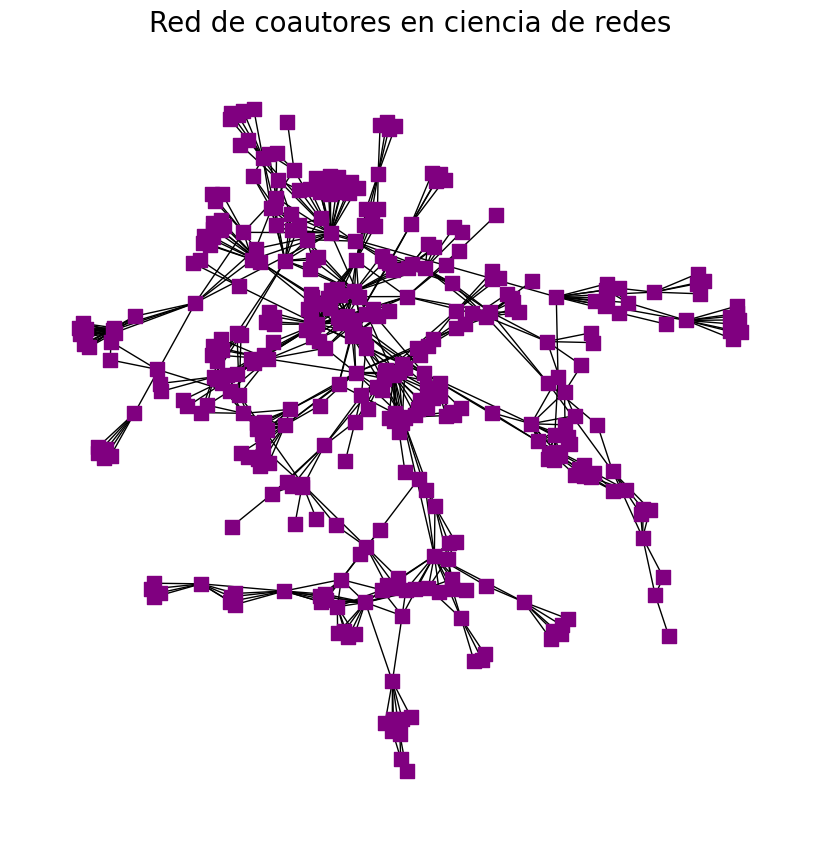

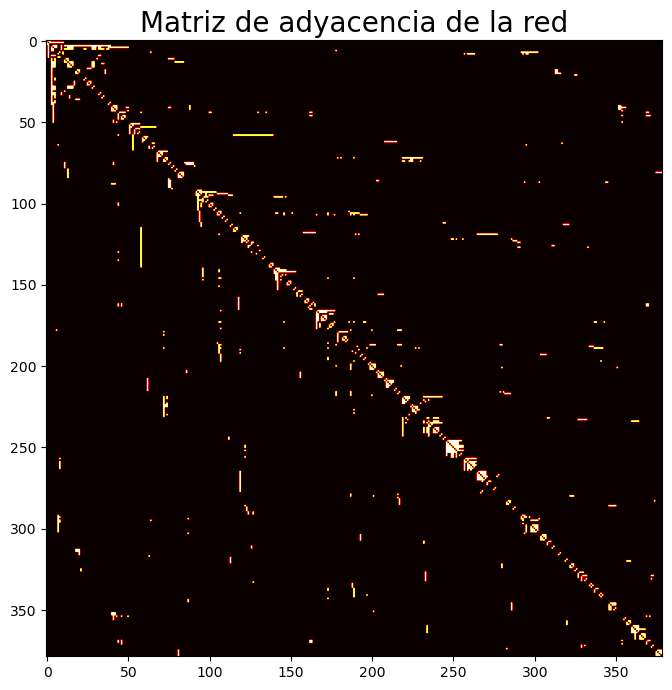

El orden de la matriz es de 379 x 379

La centralidad de grado asociada a los nodos de la red es:


{2: 0.005291005291005291,
 1: 0.026455026455026454,
 3: 0.005291005291005291,
 4: 0.08994708994708994,
 5: 0.07142857142857142,
 16: 0.05555555555555555,
 44: 0.010582010582010581,
 113: 0.03968253968253968,
 131: 0.031746031746031744,
 250: 0.015873015873015872,
 259: 0.007936507936507936,
 13: 0.023809523809523808,
 14: 0.010582010582010581,
 15: 0.042328042328042326,
 45: 0.026455026455026454,
 46: 0.021164021164021163,
 47: 0.021164021164021163,
 61: 0.010582010582010581,
 126: 0.015873015873015872,
 127: 0.015873015873015872,
 128: 0.021164021164021163,
 146: 0.007936507936507936,
 152: 0.0026455026455026454,
 153: 0.007936507936507936,
 154: 0.007936507936507936,
 164: 0.010582010582010581,
 165: 0.010582010582010581,
 166: 0.010582010582010581,
 176: 0.021164021164021163,
 177: 0.021164021164021163,
 249: 0.007936507936507936,
 274: 0.005291005291005291,
 313: 0.013227513227513227,
 314: 0.013227513227513227,
 323: 0.010582010582010581,
 324: 0.010582010582010581,
 330: 0.010582


El nodo más importante con base al criterio de centralidad de grado es: 
 El nodo 4

Cuya centralidad (normalizada) es máxima y de valor: 
 0.08994708994708994


In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Leemos y mostramos la red con un formato adecuado:
datos=pd.read_csv('ca-netscience.mtx',skiprows = 2, header = None,sep = ' ' )
display(datos)

#Generar una red de NetworkX a partir del data frame Pandas:
G=nx.from_pandas_edgelist(datos,source = 0,target = 1) #Formato: (Nodo origen ,  Nodo destino)
plt.figure( figsize = [8,8] )
nx.draw(G,node_size = 100, node_color = 'purple',node_shape = 's') 
plt.title("Red de coautores en ciencia de redes",fontsize=20)
plt.show()

#Matriz de adyacencia (únicamente para ver la estructura de la red):
plt.figure( figsize = [8,8] )
A=nx.to_numpy_array(G)
plt.imshow(A,"hot") #Para ver las intensidades de la imagen que representan a los enlaces podemos usar el formato de mapa de calor
plt.title("Matriz de adyacencia de la red",fontsize=20)
plt.show()
N1,N2=A.shape
print(f"El orden de la matriz es de {N1} x {N2}")
print()

#Centralidad de grado:
grado=nx.degree_centrality(G)
print("La centralidad de grado asociada a los nodos de la red es:")
display(grado)
print()

#Centralidad máxima:
centralidad_máxima=max(grado.values())
nodo_máx=max(grado, key=grado.get)
print(f"El nodo más importante con base al criterio de centralidad de grado es: \n El nodo {nodo_máx}")
print()
print(f"Cuya centralidad (normalizada) es máxima y de valor: \n {centralidad_máxima}")

# Fin del ejercicio.